In [1]:
# project: p6
# submitter: aluo7
# partner: none
# hours: 1

In [2]:
import rasterio, sqlite3, geopandas as gpd, pandas as pd,numpy as np, matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline
from matplotlib.colors import ListedColormap
from rasterio.mask import mask
from collections import defaultdict

In [3]:
#Q1
df = gpd.read_file("counties.geojson")
len(df)

72

<AxesSubplot:>

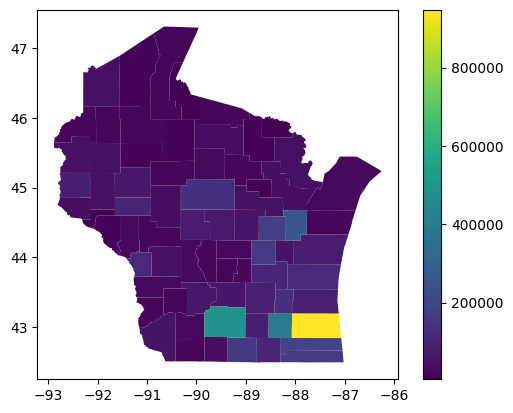

In [4]:
#Q2
df.plot(column = "POP100", legend = True, cmap = "viridis")

In [5]:
#Q3
conn = sqlite3.connect("counties_tracts.db")
db = pd.read_sql("SELECT * FROM sqlite_master", conn)
df["AREALAND"] = pd.read_sql("SELECT AREALAND FROM counties", conn)
train, test = train_test_split(df, test_size = 0.25, random_state = 250)
test.NAME.to_list()

['Dane County',
 'Juneau County',
 'Taylor County',
 'Vilas County',
 'Rusk County',
 'Price County',
 'Jackson County',
 'Waushara County',
 'Pepin County',
 'Douglas County',
 'Ashland County',
 'Milwaukee County',
 'Waupaca County',
 'Richland County',
 'Lafayette County',
 'Washburn County',
 'Dunn County',
 'Bayfield County']

In [ ]:
#Q4
model = LinearRegression()
model.fit(train[["AREALAND"]], train["POP100"])
model.score(test[["AREALAND"]], test["POP100"])

: 

In [7]:
#Q5
predict_df = pd.DataFrame({"AREALAND": [400*2.59e6]})
model.predict(predict_df)[0]

90000.07422783462

In [8]:
#Q6
counties_house = pd.read_sql("""
  SELECT counties.name, SUM(HU100) as HU100
  FROM counties INNER JOIN tracts
  ON counties.county = tracts.county
  GROUP BY counties.name""", conn)

counties_house.set_index(counties_house["NAME"],inplace=True)
df.set_index(df["NAME"],inplace=True)
df["HU100"] = counties_house["HU100"]
train, test = train_test_split(df, test_size=0.25, random_state=250)
test["NAME"].to_list()

['Dane County',
 'Juneau County',
 'Taylor County',
 'Vilas County',
 'Rusk County',
 'Price County',
 'Jackson County',
 'Waushara County',
 'Pepin County',
 'Douglas County',
 'Ashland County',
 'Milwaukee County',
 'Waupaca County',
 'Richland County',
 'Lafayette County',
 'Washburn County',
 'Dunn County',
 'Bayfield County']

In [9]:
#Q7
c_vals = test["HU100"].to_dict()
c_vals

{'Dane County': 216022,
 'Juneau County': 14669,
 'Taylor County': 10582,
 'Vilas County': 25116,
 'Rusk County': 8883,
 'Price County': 11120,
 'Jackson County': 9727,
 'Waushara County': 14843,
 'Pepin County': 3579,
 'Douglas County': 22825,
 'Ashland County': 9656,
 'Milwaukee County': 418053,
 'Waupaca County': 25396,
 'Richland County': 8868,
 'Lafayette County': 7230,
 'Washburn County': 12979,
 'Dunn County': 17964,
 'Bayfield County': 12999}

In [10]:
#Q8
scores = cross_val_score(model, train[["HU100"]], train["POP100"])
scores.mean()

0.9739348181232653

In [11]:
#Q9
scores.std()

0.01693954236334351

In [12]:
#Q10
model.fit(train[["HU100"]], train["POP100"])
eq = f"POP100 = {round(model.coef_[0], 2)}*HU100 + {round(model.intercept_, 2)}"
eq

'POP100 = 2.47*HU100 + -9276.89'

Text(104371, 248007, 'Brown')

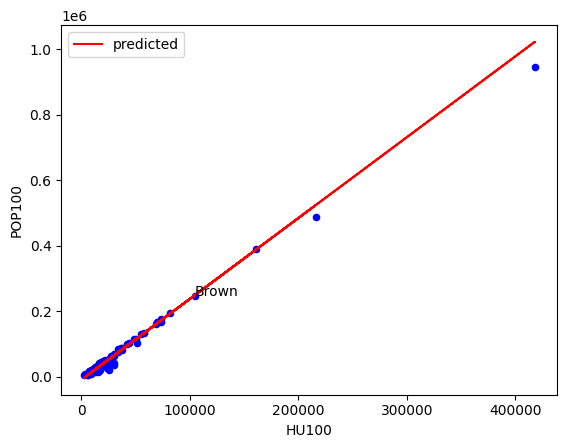

In [13]:
#Q11
df["predicted"] = model.predict(df[["HU100"]])
ax = df.plot.line(x = "HU100", y = "predicted", color = "r")
df.plot.scatter(x = "HU100", y = "POP100", ax = ax, color = "b").text(df.loc["Brown County", "HU100"], df.loc["Brown County", "POP100"], "Brown")

In [14]:
#Q12
A = np.array([
    [0,0,5,8,4],
    [1,2,4,0,3],
    [2,4,0,9,2],
    [3,5,2,1,1],
    [0,5,0,1,0]
])
len(A[(A >= 3) & (A <= 6)])

8

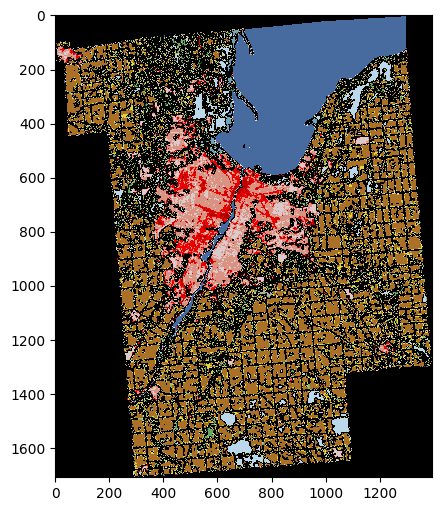

In [15]:
#Q13
from matplotlib.colors import ListedColormap

c = np.zeros((256,3))
c[0] = [0.00000000000, 0.00000000000, 0.00000000000]
c[11] = [0.27843137255, 0.41960784314, 0.62745098039]
c[12] = [0.81960784314, 0.86666666667, 0.97647058824]
c[21] = [0.86666666667, 0.78823529412, 0.78823529412]
c[22] = [0.84705882353, 0.57647058824, 0.50980392157]
c[23] = [0.92941176471, 0.00000000000, 0.00000000000]
c[24] = [0.66666666667, 0.00000000000, 0.00000000000]
c[31] = [0.69803921569, 0.67843137255, 0.63921568628]
c[41] = [0.40784313726, 0.66666666667, 0.38823529412]
c[42] = [0.10980392157, 0.38823529412, 0.18823529412]
c[43] = [0.70980392157, 0.78823529412, 0.55686274510]
c[51] = [0.64705882353, 0.54901960784, 0.18823529412]
c[52] = [0.80000000000, 0.72941176471, 0.48627450980]
c[71] = [0.88627450980, 0.88627450980, 0.75686274510]
c[72] = [0.78823529412, 0.78823529412, 0.46666666667]
c[73] = [0.60000000000, 0.75686274510, 0.27843137255]
c[74] = [0.46666666667, 0.67843137255, 0.57647058824]
c[81] = [0.85882352941, 0.84705882353, 0.23921568628]
c[82] = [0.66666666667, 0.43921568628, 0.15686274510]
c[90] = [0.72941176471, 0.84705882353, 0.91764705882]
c[95] = [0.43921568628, 0.63921568628, 0.72941176471]
custom_cmap = ListedColormap(c)

land = rasterio.open("zip://../p6/land.zip!wi.tif")
matrix, _ = mask(land, df[df["NAME"] == "Brown County"].to_crs(land.crs)["geometry"], crop=True)
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(matrix[0], vmin=0, vmax=255, cmap = custom_cmap)

In [16]:
#Q14
land_use = {"open_water": 11,
            "ice_snow": 12,
            "developed_open": 21,
            "developed_low": 22,
            "developed_med": 23,
            "developed_high": 24,
            "barren": 31,
            "deciduous": 41,
            "evergreen": 42,
            "mixed_forest": 43,
            "dwarf_scrub": 51,
            "shrub_scrub": 52,
            "grassland": 71,
            "sedge": 72,
            "lichens": 73,
            "moss": 74,
            "pasture": 81,
            "crops": 82,
            "woody_wetlands": 90,
            "herbacious_wetlands": 95}

o_w = len(matrix[(matrix > 0) & (matrix == 11)])
b_c = len(matrix[matrix > 0])
o_w / b_c

0.13797526789725206

<AxesSubplot:xlabel='Moss / County', ylabel='POP100'>

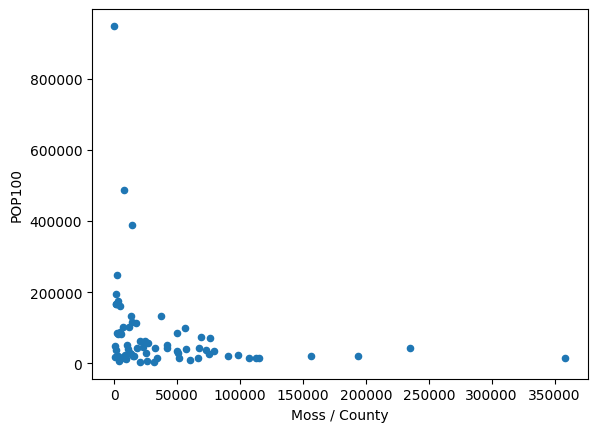

In [17]:
#Q15
moss_per_county = {}
for x in df["NAME"]:
    matrix, _ = mask(land, df[df["NAME"] == x].to_crs(land.crs)["geometry"], crop=True)
    matrix = matrix[0]
    m = len(matrix[(matrix > 0) & (matrix == 42)])
    moss_per_county[x] = m
    
df["Moss / County"] = pd.Series(moss_per_county)
df.plot.scatter(x = "Moss / County", y = "POP100")

<AxesSubplot:>

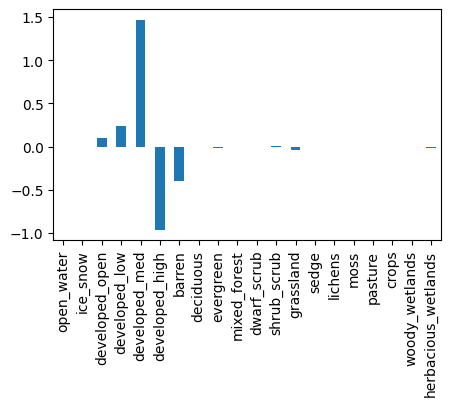

In [18]:
#Q16
land_cell_counts = defaultdict(list)
    
tract_df = gpd.read_file("tracts.shp")
for x in tract_df["GEOID"]:
    matrix, _ = mask(land, tract_df[tract_df["GEOID"] == x].to_crs(land.crs)["geometry"], crop=True)
    matrix = matrix[0]
    for y in land_use:
        m = len(matrix[(matrix > 0) & (matrix == land_use[y])])
        land_cell_counts[y].append(m)
        
for x in land_use:
    tract_df[x] = land_cell_counts[x]
    
train, test = train_test_split(tract_df, random_state = 320)
xcols = list(land_use.keys())
model.fit(train[xcols], train["POP100"])
model.score(test[xcols], test["POP100"])
pd.Series(model.coef_, index=xcols).plot.bar(figsize=(5,3)) # the graph shows us the coefficients explaining the counts of land cells per populous 
                                                            # within that county

In [19]:
#Q17
m1 = LinearRegression()
scores1 = cross_val_score(m1, train[xcols], train["POP100"], cv=10) # using this model yields the best results as it has an avg score of ~0.498, 
                                                                    # meaning it explains the population well

m2 = Pipeline([
    ("pf", PolynomialFeatures()),
    ("lr", LinearRegression())
])
scores2 = cross_val_score(m2, train[xcols], train["POP100"], cv=10)

if scores1.mean() > scores2.mean(): # m1 explains the dataset better than m2 so we use m1
    m1.fit(train[xcols], train["POP100"])
    s = m1.score(test[xcols], test["POP100"])
    
s

0.44867285416657754